In [1]:
"""
Updated on Sun Apr  19.

Script for lesson 4 of "Friends of Tracking" #FoT

Data can be found at: https://github.com/metrica-sports/sample-data

@author: Laurie Shaw (@EightyFivePoint).
"""

import Metrica_IO as mio
import Metrica_Viz as mviz

# set up initial path to data
DATADIR = '/PATH/TO/WHERE/YOU/SAVED/THE/SAMPLE/DATA'

# let's look at sample match 2:
game_id = 2

# read in the event data
events = mio.read_event_data(DATADIR,game_id)

In [2]:
# count the number of each event type in the data
print( events['Type'].value_counts() )

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64


In [3]:
# Bit of housekeeping: unit conversion from metric data units to meters!
events = mio.to_metric_coordinates(events)

In [4]:
# Get events by team
home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']

# Frequency of each event type by team
home_events['Type'].value_counts()

# In like manner, if I wanted to check for the away team:
#away_events['Type'].value_counts()

PASS              543
CHALLENGE         160
RECOVERY          135
BALL LOST         120
SET PIECE          34
BALL OUT           27
SHOT               13
FAULT RECEIVED      9
CARD                3
Name: Type, dtype: int64

In [5]:
# Get all shots
shots = events[events['Type']=='SHOT']
home_shots = home_events[home_events.Type=='SHOT']
away_shots = away_events[away_events.Type=='SHOT']

# Look at frequency of each shot Subtype
home_shots['Subtype'].value_counts()

# In like manner, if I wanted to check for the away team:
#away_shots['Subtype'].value_counts()

HEAD-OFF TARGET-OUT    4
ON TARGET-SAVED        4
ON TARGET-GOAL         2
OFF TARGET-OUT         2
HEAD-ON TARGET-GOAL    1
Name: Subtype, dtype: int64

In [6]:
# Look at the number of shots taken by each home player
print( home_shots['From'].value_counts() )

Player9     4
Player10    3
Player5     2
Player7     1
Player4     1
Player12    1
Player3     1
Name: From, dtype: int64


In [7]:
# Get the shots that led to a goal
home_goals = home_shots[home_shots['Subtype'].str.contains('-GOAL')].copy()
away_goals = away_shots[away_shots['Subtype'].str.contains('-GOAL')].copy()

In [8]:
# Add a column event 'Minute' to the data frame
home_goals['Minute'] = home_goals['Start Time [s]']/60.

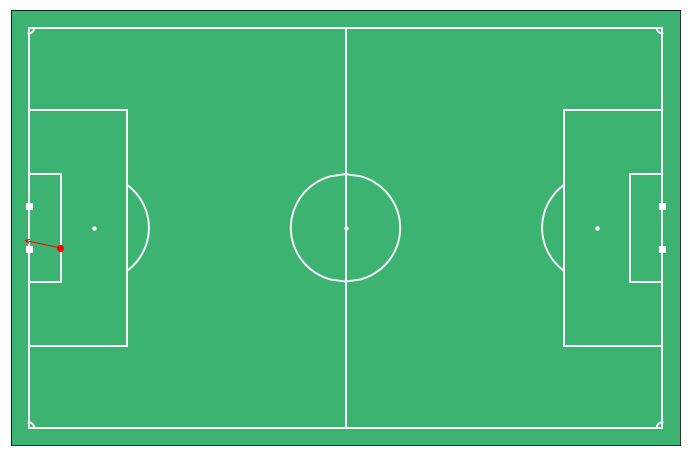

In [9]:
# Plot the first goal
fig,ax = mviz.plot_pitch()
ax.plot( events.loc[198]['Start X'], events.loc[198]['Start Y'], 'ro' )
ax.annotate("", xy=events.loc[198][['End X','End Y']], xytext=events.loc[198][['Start X','Start Y']], 
            alpha=0.6, arrowprops=dict(arrowstyle="->",color='r'));

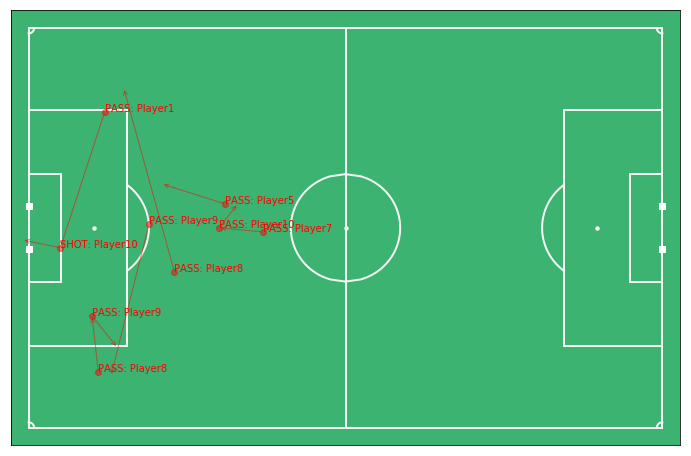

In [10]:
# plot passing move in run up to goal
mviz.plot_events( events.loc[190:198], indicators = ['Marker','Arrow'], annotate=True );

<h3>TRACKING DATA </h3> 

In [11]:
# READING IN TRACKING DATA
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

# Look at the column namems
print( tracking_home.columns )

Reading team: home
Reading team: away
Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')


In [12]:
# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)


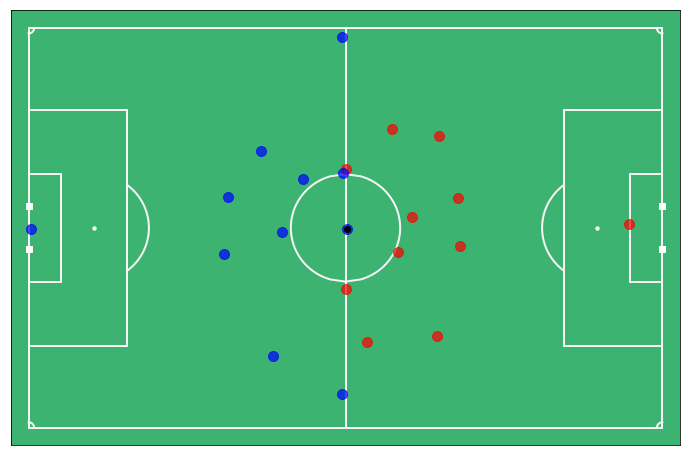

In [13]:
# plot player positions at ,atckick-off
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] ) 

# mviz.plot_frame
# Plots a frame of Metrica tracking data (player positions and the ball) on a football pitch. All distances should be in meters.
    

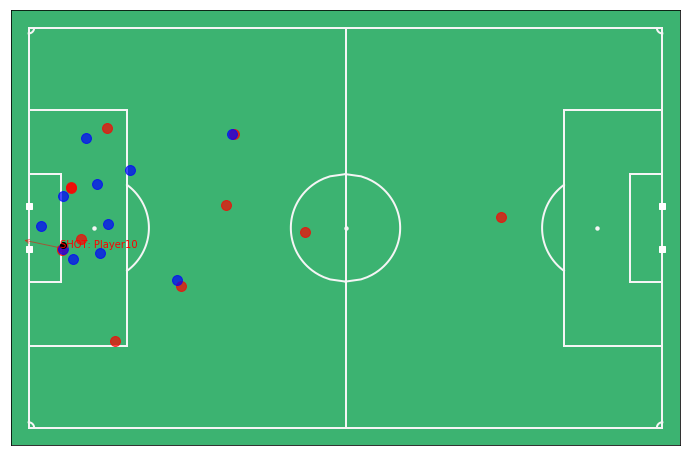

In [14]:

# PLOT POISTIONS AT GOAL
fig,ax = mviz.plot_events( events.loc[198:198], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[198]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) )


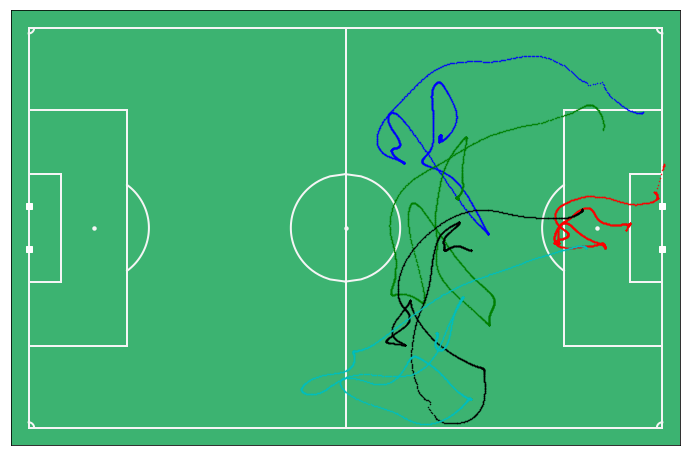

In [15]:
# Plot some player trajectories 
#(players 11,1,2,3,4; timestamp till 1500) 
fig,ax = mviz.plot_pitch()


ax.plot( tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r.', MarkerSize=1)
ax.plot( tracking_home['Home_1_x'].iloc[:1500], tracking_home['Home_1_y'].iloc[:1500], 'b.', MarkerSize=1)
ax.plot( tracking_home['Home_2_x'].iloc[:1500], tracking_home['Home_2_y'].iloc[:1500], 'g.', MarkerSize=1)
ax.plot( tracking_home['Home_3_x'].iloc[:1500], tracking_home['Home_3_y'].iloc[:1500], 'k.', MarkerSize=1)
ax.plot( tracking_home['Home_4_x'].iloc[:1500], tracking_home['Home_4_y'].iloc[:1500], 'c.', MarkerSize=1);